In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X']
y = Training_Set['y']

#transform X, y to a flat lists
X = [item for sublist in X for item in sublist]
X = np.array(X)

y = [item for sublist in y for item in sublist]
y = np.array(y)


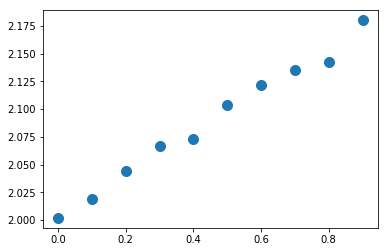

In [2]:
#A Plot the data
plt.plot(X, y,'o', label='Original data', markersize=10)
plt.show()

In [3]:
#B LS approach
#constract the X matrix with the 8th degree polynomial
X_stack = np.stack((np.ones(len(X)), list(pow(X,1)), list(pow(X,2)), list(pow(X,3)), 
                     list(pow(X,4)), list(pow(X,5)), list(pow(X,6)),list(pow(X,7)),list(pow(X,8))), axis =-1)


In [4]:
#OLS theta
X_Xt_inverse = np.linalg.inv(np.dot(X_stack.T,X_stack))
theta = X_Xt_inverse.dot(X_stack.T).dot(np.array(y))
theta

array([ 2.00199293e+00,  2.59427409e-01, -3.83264320e+00,  4.94215250e+01,
       -2.62210445e+02,  6.98312143e+02, -9.86600723e+02,  7.06150245e+02,
       -2.01452693e+02])

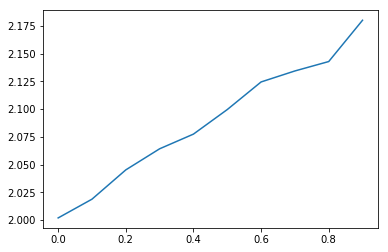

In [5]:
#estimate the ys with the theta calculated above 
y_hat = theta.dot(X_stack.T)
#plot the data
plt.plot(X, y_hat , label='Original data', markersize=10)
plt.show()

In [12]:
#C regularized LS
I = np.identity(9)
#we can try any value for λ(Lambda)
Lambda = 0.005
theta_ridge = np.linalg.inv((X_stack.T).dot(X_stack) + Lambda*I).dot(X_stack.T).dot(y)
theta_ridge

array([ 1.99754574,  0.2162287 ,  0.00521584, -0.03864305, -0.03488279,
       -0.01560239,  0.00787319,  0.03051106,  0.04998413])

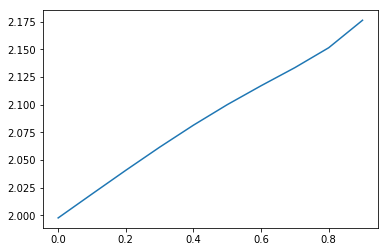

[ 1.99754574  0.2162287   0.00521584 -0.03864305 -0.03488279 -0.01560239
  0.00787319  0.03051106  0.04998413]


In [13]:
#estimate the ys with the theta_ridge
y_ridge = theta_ridge.dot(X_stack.T)
#plot the data
plt.plot(X, y_ridge , label='Original data', markersize=10)
plt.show()
print(theta_ridge)

In [ ]:
#Ridge Regression is a remedial measure taken to alleviate multicollinearity amongst regression predictor variables in a model.